## Imports

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd

from src.graphs.graph_loader import GraphDataset

## Params

In [2]:
LOAD_FOLDER = '/datasets/johan_tests_original_format_graphs_bm25/'\
    'similarity_shape_100_20__score_threshold_006__similarity_relevance_07/testset4'

In [3]:
BATCH_SIZE = 3

In [4]:
VAL_PERCENTAGE = 0.15
TEST_PERCENTAGE = 0.15

In [5]:
RELEVANCE_THRESHOLD = 10

In [6]:
RANDOM_STATE = 42

## Constants

In [7]:
dataset = GraphDataset(
    dataset_path=LOAD_FOLDER,
    batch_size=BATCH_SIZE,
    val_percentage=VAL_PERCENTAGE,
    test_percentage=TEST_PERCENTAGE,
    random_state=RANDOM_STATE,
    score_threshold=RELEVANCE_THRESHOLD
)

In [8]:
dataset.metadata[
    dataset.metadata['origin'] != 'original'
]['score'].describe()

count    7615.000000
mean        0.262584
std         0.076001
min         0.112368
25%         0.211094
50%         0.248193
75%         0.309416
max         0.632337
Name: score, dtype: float64

<AxesSubplot:ylabel='Frequency'>

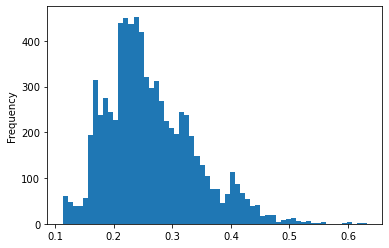

In [9]:
dataset.metadata[
    dataset.metadata['origin'] != 'original'
]['score'].plot(kind='hist', bins=60)

In [10]:
dataset.metadata[
    dataset.metadata['origin'] != 'original'
]['score'].quantile(0.8)

0.32266704

In [19]:
for split,df in dataset.splits.items():
    print('*' * 20)
    print(df['question_id'].nunique())
    print(split, df['label'].value_counts())


********************
62
train 0.0    4591
1.0     620
Name: label, dtype: int64
********************
14
val 0.0    1088
1.0     140
Name: label, dtype: int64
********************
14
test 0.0    1036
1.0     140
Name: label, dtype: int64


In [12]:
train_batch_generator = dataset.get_batch('train')
for i, b in enumerate(train_batch_generator):
    print(b)
    break

DataBatch(x=[300, 20], edge_index=[2, 29290], y=[3], batch=[300], ptr=[4])


In [13]:
val_batch_generator = dataset.get_batch('val')
for i, b in enumerate(val_batch_generator):
    print(b)
    break

DataBatch(x=[300, 20], edge_index=[2, 29439], y=[3], batch=[300], ptr=[4])


In [14]:
test_batch_generator = dataset.get_batch('test')
for i, b in enumerate(test_batch_generator):
    print(b)
    break

DataBatch(x=[300, 20], edge_index=[2, 29298], y=[3], batch=[300], ptr=[4])
